In [7]:
# General
import numpy as np
import torch
import torch.nn.functional as F
from importlib import reload
from types import SimpleNamespace
import shap

# Custom
import utils
reload(utils)

import data
reload(data)

import train
reload(train)

import modules
reload(modules)
from modules import GCN, GCN_GNNExplainer, GCN_GraphSVX
from modules import GraphSAGE
from torch_geometric.data import DataLoader
import torch.optim as optim

import explanations
reload(explanations)
from explanations import LIME_explanation, SHAP_explanation

import GraphSVX_explainers
reload(GraphSVX_explainers)
from GraphSVX_explainers import GraphSVX

%matplotlib inline
import torch_geometric
from torch_geometric.data import Data



# Train model

In [8]:
seed=42
torch.manual_seed(seed)


In [10]:
hyperparameters = {'hidden_channels': 15,
                   'num_heads': 3,
                    'dropout': 0.2,
                    'lr': 0.001,
                    'epochs': 1000,
                    'beta': 0.9999,
                    'seed':seed}


model, traindata, testdata, feature_names, target_names, running_train_loss, running_test_loss, accuracy = train.train_graphSAGE_foroptuna(hyperparameters, verbose = True)
#model, traindata, testdata, feature_names, target_names, running_train_loss, running_test_loss, accuracy = train.train_GAT_GraphSVX_foroptuna(hyperparameters, verbose = True)

n_sar_accs_train = traindata.y[traindata.y == 1].shape[0]
n_sar_accs_test = testdata.y[testdata.y == 1].shape[0]
print(f"Number of SARs in training set: {n_sar_accs_train} out of {traindata.y.shape[0]}")
print(f"Number of SARs in test set: {n_sar_accs_test} out of {testdata.y.shape[0]}")

epoch: 1, train_loss: 0.3437, test_loss: 0.31856516003608704, accuracy: 0.1533, balanced_accuracy: 0.5025, precision: 0.0301, recall: 0.8739, f0.9999: 0.0583
epoch: 10, train_loss: 0.3222, test_loss: 0.3119010925292969, accuracy: 0.3882, balanced_accuracy: 0.5111, precision: 0.0310, recall: 0.6418, f0.9999: 0.0592
epoch: 20, train_loss: 0.3065, test_loss: 0.3072866201400757, accuracy: 0.5224, balanced_accuracy: 0.5410, precision: 0.0349, recall: 0.5609, f0.9999: 0.0657
epoch: 30, train_loss: 0.2934, test_loss: 0.2983739674091339, accuracy: 0.7011, balanced_accuracy: 0.5868, precision: 0.0470, recall: 0.4652, f0.9999: 0.0853
epoch: 40, train_loss: 0.2801, test_loss: 0.28699037432670593, accuracy: 0.8207, balanced_accuracy: 0.6091, precision: 0.0668, recall: 0.3839, f0.9999: 0.1138
epoch: 50, train_loss: 0.2675, test_loss: 0.27210375666618347, accuracy: 0.8902, balanced_accuracy: 0.6012, precision: 0.0904, recall: 0.2936, f0.9999: 0.1382
epoch: 60, train_loss: 0.2558, test_loss: 0.257451

epoch: 1, train_loss: 0.3437, test_loss: 0.3185657560825348, accuracy: 0.1533, balanced_accuracy: 0.5025, precision: 0.0301, recall: 0.8739, f0.9999: 0.0583
epoch: 10, train_loss: 0.3222, test_loss: 0.31189143657684326, accuracy: 0.3886, balanced_accuracy: 0.5113, precision: 0.0310, recall: 0.6418, f0.9999: 0.0592
epoch: 20, train_loss: 0.3065, test_loss: 0.30727165937423706, accuracy: 0.5229, balanced_accuracy: 0.5411, precision: 0.0349, recall: 0.5605, f0.9999: 0.0658
epoch: 30, train_loss: 0.2934, test_loss: 0.2983500361442566, accuracy: 0.7017, balanced_accuracy: 0.5868, precision: 0.0470, recall: 0.4645, f0.9999: 0.0854
epoch: 40, train_loss: 0.2801, test_loss: 0.2869753837585449, accuracy: 0.8209, balanced_accuracy: 0.6090, precision: 0.0668, recall: 0.3836, f0.9999: 0.1137
epoch: 50, train_loss: 0.2675, test_loss: 0.2720987796783447, accuracy: 0.8904, balanced_accuracy: 0.6012, precision: 0.0905, recall: 0.2936, f0.9999: 0.1383
epoch: 60, train_loss: 0.2558, test_loss: 0.25746339559555054, accuracy: 0.9265, balanced_accuracy: 0.5860, precision: 0.1177, recall: 0.2237, f0.9999: 0.1543
epoch: 70, train_loss: 0.2453, test_loss: 0.24589543044567108, accuracy: 0.9436, balanced_accuracy: 0.5729, precision: 0.1442, recall: 0.1786, f0.9999: 0.1596
epoch: 80, train_loss: 0.2369, test_loss: 0.23645582795143127, accuracy: 0.9541, balanced_accuracy: 0.5626, precision: 0.1777, recall: 0.1462, f0.9999: 0.1604
epoch: 90, train_loss: 0.2290, test_loss: 0.22869102656841278, accuracy: 0.9603, balanced_accuracy: 0.5538, precision: 0.2138, recall: 0.1214, f0.9999: 0.1549
epoch: 100, train_loss: 0.2218, test_loss: 0.22167183458805084, accuracy: 0.9634, balanced_accuracy: 0.5489, precision: 0.2473, recall: 0.1080, f0.9999: 0.1504
epoch: 110, train_loss: 0.2150, test_loss: 0.21502506732940674, accuracy: 0.9657, balanced_accuracy: 0.5467, precision: 0.2904, recall: 0.1010, f0.9999: 0.1499
epoch: 120, train_loss: 0.2085, test_loss: 0.20916594564914703, accuracy: 0.9671, balanced_accuracy: 0.5421, precision: 0.3237, recall: 0.0900, f0.9999: 0.1408
epoch: 130, train_loss: 0.2022, test_loss: 0.20369049906730652, accuracy: 0.9683, balanced_accuracy: 0.5388, precision: 0.3684, recall: 0.0819, f0.9999: 0.1341
epoch: 140, train_loss: 0.1962, test_loss: 0.1982847899198532, accuracy: 0.9688, balanced_accuracy: 0.5354, precision: 0.3936, recall: 0.0742, f0.9999: 0.1249
epoch: 150, train_loss: 0.1902, test_loss: 0.19327902793884277, accuracy: 0.9692, balanced_accuracy: 0.5330, precision: 0.4187, recall: 0.0689, f0.9999: 0.1183
epoch: 160, train_loss: 0.1843, test_loss: 0.1875678151845932, accuracy: 0.9696, balanced_accuracy: 0.5293, precision: 0.4527, recall: 0.0609, f0.9999: 0.1073
epoch: 170, train_loss: 0.1785, test_loss: 0.18232809007167816, accuracy: 0.9697, balanced_accuracy: 0.5250, precision: 0.4572, recall: 0.0518, f0.9999: 0.0931
epoch: 180, train_loss: 0.1730, test_loss: 0.17734047770500183, accuracy: 0.9701, balanced_accuracy: 0.5225, precision: 0.5073, recall: 0.0465, f0.9999: 0.0852
epoch: 190, train_loss: 0.1675, test_loss: 0.17202812433242798, accuracy: 0.9703, balanced_accuracy: 0.5226, precision: 0.5430, recall: 0.0465, f0.9999: 0.0857
epoch: 200, train_loss: 0.1622, test_loss: 0.16747769713401794, accuracy: 0.9702, balanced_accuracy: 0.5254, precision: 0.5253, recall: 0.0522, f0.9999: 0.0949
epoch: 210, train_loss: 0.1569, test_loss: 0.16192513704299927, accuracy: 0.9702, balanced_accuracy: 0.5260, precision: 0.5246, recall: 0.0535, f0.9999: 0.0971
epoch: 220, train_loss: 0.1518, test_loss: 0.15694426000118256, accuracy: 0.9702, balanced_accuracy: 0.5312, precision: 0.5289, recall: 0.0642, f0.9999: 0.1145
epoch: 230, train_loss: 0.1469, test_loss: 0.15274155139923096, accuracy: 0.9702, balanced_accuracy: 0.5372, precision: 0.5205, recall: 0.0766, f0.9999: 0.1335
epoch: 240, train_loss: 0.1422, test_loss: 0.1493908017873764, accuracy: 0.9702, balanced_accuracy: 0.5474, precision: 0.5150, recall: 0.0977, f0.9999: 0.1642
...
epoch: 990, train_loss: 0.0579, test_loss: 0.09107869118452072, accuracy: 0.9458, balanced_accuracy: 0.7936, precision: 0.3047, recall: 0.6318, f0.9999: 0.4111
epoch: 1000, train_loss: 0.0577, test_loss: 0.09124680608510971, accuracy: 0.9459, balanced_accuracy: 0.7921, precision: 0.3048, recall: 0.6284, f0.9999: 0.4105
Number of SARs in training set: 2896 out of 99928
Number of SARs in test set: 2990 out of 99766


In [2]:
# Choose model and dataset here
model_name = 'GAT'
dataset_name = '100K_accts_EASY25'

# Load model, data, and other variables
model_path = f'trained_models/{model_name}_{dataset_name}.pth'

checkpoint = torch.load(model_path)
model_state_dict = checkpoint['model_state_dict']
hyperparameters = checkpoint['hyperparameters']
traindata = checkpoint['traindata']
testdata = checkpoint['testdata']
feature_names = checkpoint['feature_names']
feature_names=['sums, in_sum, out_sum, in_mean, out_mean, in_median, out_median, in_std, out_std, in_max, out_max, in_min, out_min, count_in, count_out, n_unique_in, n_unique_out, count_days_in_bank, count_phone_changes, sums_spending, means_spending, medians_spending, stds_spending, maxs_spending, mins_spending, counts_spending']
target_names = checkpoint['target_names']
running_train_loss = checkpoint['running_train_loss']
running_test_loss = checkpoint['running_test_loss']
accuracy = checkpoint['accuracy']

# Initialize model
if model_name == 'GAT':
    in_channels = traindata.x.shape[1]
    hidden_channels = hyperparameters['hidden_channels']
    out_channels = 2
    num_heads = hyperparameters['num_heads']
    dropout = hyperparameters['dropout']
    model = modules.GAT_GraphSVX_foroptuna(in_channels = in_channels, hidden_channels=hidden_channels, out_channels=out_channels, num_heads=num_heads, dropout=dropout)

model.load_state_dict(checkpoint['model_state_dict'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
traindata = traindata.to(device)
testdata = testdata.to(device)
model.eval()

Can't initialize NVML


GAT_GraphSVX_foroptuna(
  (conv1): GATConv(32, 15, heads=3)
  (conv2): GATConv(45, 15, heads=3)
  (conv3): GATConv(45, 15, heads=1)
  (MLP_post1): Linear(in_features=15, out_features=15, bias=True)
  (MLP_post2): Linear(in_features=15, out_features=2, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [11]:
model.set_return_type('log_probas')


In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
torch.manual_seed(seed)
np.random.seed(seed)

model.eval()
with torch.no_grad():
    out = model.forward(testdata.x, testdata.edge_index)
    out = torch.exp(out)
    y_pred = out.cpu().numpy().argmax(axis=1)
    print(y_pred)
    
    y_true = testdata.y.cpu().numpy()
    print(y_true)
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[[92591  4185]
 [ 1078  1912]]


[0 0 1 ... 0 0 0]
[0 0 0 ... 0 0 0]
[[92591  4185]
 [ 1078  1912]]

In [14]:
#find the indices of the predicted class 1
sar_indices = np.where(y_pred == 1)[0]
print(sar_indices)

[    2     7    12 ... 99593 99609 99720]


2
0
1


ERROR! Session/line number was not unique in database. History logging moved to new session 365


# Applying GraphSVX

In [29]:
node_to_explain = sar_indices[2].item()
print(f'Explaining node {node_to_explain} which was prediced SAR.')
print(f'The node was predicted {out[node_to_explain].argmax().item()} with probability {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.')
print(f'The true label is {testdata.y[node_to_explain]}.\n')

subset_expl, edge_index_expl, _, _ = torch_geometric.utils.k_hop_subgraph(node_to_explain, 3, directed_data.edge_index, relabel_nodes=False)

n_nodes=subset_expl.shape[0]

num_samples=345#5*n_nodes


testdata=testdata.to('cpu')
model=model.to('cpu')


data=SimpleNamespace()
data.x=testdata.x
data.edge_index=testdata.edge_index
data.y=testdata.y
data.num_nodes=testdata.x.shape[0]
data.num_classes=2
data.name='test'

#print('inskick',data.edge_index)
explainer=GraphSVX(data,model,True)
explanations = explainer.explain(node_indexes=[node_to_explain], num_samples=num_samples, hops = 3, vizu = False, seed=seed)



Explaining node 12 which was prediced SAR.
The node was predicted 1 with probability 0.8834.
The true label is 1.

self neighbours tensor([ 1588,  1751,  1839,  3789,  7537,  8545,  8746,  9452, 11222, 12886,
        14041, 14704, 15085, 16438, 16630, 17855, 18338, 18938, 21229, 21935,
        24815, 25356, 27939, 28749, 29101, 30190, 32764, 39000, 41610, 43132,
        45482, 45555, 45807, 49262, 54956, 55529, 57664, 63643, 65771, 66155,
        69391, 69968, 70044, 70522, 72548, 72857, 73148, 74345, 78424, 78708,
        79844, 80702, 81741, 83451, 84631, 85021, 85852, 86238, 86475, 87341,
        88378, 89434, 91340, 91976, 93577, 95126, 96760, 97997])
one_hop_neighbours tensor([   12,  8746, 18938, 57664, 80702])


345it [05:12,  1.11it/s]


r2:  0.9348583898565218
weighted r2:  0.999981618398404
Explanations include 23 node features and 68 neighbours for this node        for 2 classes
Neighbors are tensor([ 1588,  1751,  1839,  3789,  7537,  8545,  8746,  9452, 11222, 12886,
        14041, 14704, 15085, 16438, 16630, 17855, 18338, 18938, 21229, 21935,
        24815, 25356, 27939, 28749, 29101, 30190, 32764, 39000, 41610, 43132,
        45482, 45555, 45807, 49262, 54956, 55529, 57664, 63643, 65771, 66155,
        69391, 69968, 70044, 70522, 72548, 72857, 73148, 74345, 78424, 78708,
        79844, 80702, 81741, 83451, 84631, 85021, 85852, 86238, 86475, 87341,
        88378, 89434, 91340, 91976, 93577, 95126, 96760, 97997])
Model prediction is class 1 with confidence 0.883439838886261, while true label is 1
Base value 2.8210189190192025e-06 for class  1
Weights for node features:  0.5194816672046727 and neighbours:  0.36394423880119575
Most influential features:  4 and neighbours 2
Most influential features:  [(20, 0.4616966

In [31]:
node_to_explain=sar_indices[2].item()
print(f'Explaining node {node_to_explain} which was prediced SAR.')
print(f'The node was predicted {out[node_to_explain].argmax().item()} with probability {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.')

print(f'The true label is {testdata.y[node_to_explain]}.\n')


subset_expl, edge_index_expl, _, _ = torch_geometric.utils.k_hop_subgraph(node_to_explain, 3, testdata.edge_index, relabel_nodes=False)
new_to_org_mapping, org_to_new_mapping, edges_new=utils.node_index_mapping(subset_expl, edge_index_expl)

# print('edges new', edges_new)
num_nodes=subset_expl.shape[0]
num_samples=5*num_nodes
edge_index_expl
edges_new
testdata_expl=Data(x=testdata.x[subset_expl], edge_index=edges_new, y=testdata.y[subset_expl])

testdata_expl=testdata_expl.to('cpu')
model=model.to('cpu')

data=SimpleNamespace()
data.x=testdata_expl.x
data.edge_index=testdata_expl.edge_index
data.y=testdata_expl.y
data.num_nodes=testdata_expl.x.shape[0]
data.num_classes=3
data.name='test'
# print('data edge index',data.edge_index)
explainer=GraphSVX(data,model,True)
explanations = explainer.explain(node_indexes=[0], num_samples=num_samples, hops = 3, vizu = False, seed=seed)


Explaining node 12 which was prediced SAR.
The node was predicted 1 with probability 0.8834.
The true label is 1.

self neighbours tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])
one_hop_neighbours tensor([ 0,  7, 18, 37, 52])


345it [00:02, 144.14it/s]


r2:  0.9539403420665485
weighted r2:  0.9999877691420194
Explanations include 25 node features and 68 neighbours for this node        for 3 classes
Neighbors are tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])
Model prediction is class 1 with confidence 0.7191532850265503, while true label is 1
Base value 9.619428104623573e-06 for class  1
Weights for node features:  0.044484713980295965 and neighbours:  0.6746654817283684
Most influential features:  5 and neighbours 1
Most influential features:  [(14, 0.20586977975830223), (4, 0.1455085754216725), (8, -0.09150306125428642)]
Most influential neighbours:  [(37, 0.16516758744410254), (7, 0.06911770945811213), (9, 0.06449791278168959)]
Time:  3.935612678527832


In [32]:
node_to_explain = sar_indices[2].item()
print(f'Explaining node {node_to_explain} which was prediced SAR.')
print(f'The node was predicted {out[node_to_explain].argmax().item()} with probability {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.')
print(f'The true label is {testdata.y[node_to_explain]}.\n')

directed_data=Data(x=testdata.x, edge_index=testdata.edge_index)
directed_data=torch_geometric.transforms.ToUndirected()(directed_data)

subset_expl, edge_index_expl, _, _ = torch_geometric.utils.k_hop_subgraph(node_to_explain, 3, directed_data.edge_index, relabel_nodes=False)
#print('edge_index_expl', edge_index_expl)
org_to_new_mapping, new_to_org_mapping, edges_new=utils.node_index_mapping(subset_expl, edge_index_expl)
print(new_to_org_mapping[0])
#print('new edges', edges_new)


Explaining node 12 which was prediced SAR.
The node was predicted 1 with probability 0.8525.
The true label is 1.

12


In [40]:
testdata.x[subset_expl[3]]

tensor([-1.3228, -1.0531, -1.1645, -0.2212,  0.4721, -0.1887, -0.2020, -1.5738,
         1.0582, -0.2653,  0.5245, -0.2725,  0.2434, -0.3799,  0.4494, -0.3749,
         1.9166, -0.1520, -0.2985,  1.5248, -0.2830,  0.2839,  1.2004, -0.0207,
        -0.4677, -0.5209,  0.2342, -0.5354, -0.5176, -0.6966,  0.2477])

In [16]:
node_to_explain=sar_indices[0].item()
print(f'Explaining node {node_to_explain} which was prediced SAR.')
print(f'The node was predicted {out[node_to_explain].argmax().item()} with probability {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.')
print(f'The true label is {testdata.y[node_to_explain]}.\n')



subset_expl, edge_index_expl, _, _ = torch_geometric.utils.k_hop_subgraph(node_to_explain, 3, testdata.edge_index, relabel_nodes=False)
new_to_org_mapping, org_to_new_mapping, edges_new=utils.node_index_mapping(subset_expl, edge_index_expl)

print('subsetexpl', subset_expl)

testdata_expl=Data(x=testdata.x[subset_expl], edge_index=edges_new, y=testdata.y[subset_expl])
n_nodes=subset_expl.shape[0]
print(n_nodes)
num_samples=5*n_nodes


testdata_expl=testdata_expl.to('cpu')
model=model.to('cpu')


data=SimpleNamespace()
data.x=testdata_expl.x
data.edge_index=testdata_expl.edge_index
data.y=testdata_expl.y
data.num_nodes=testdata_expl.x.shape[0]
data.num_classes=2
data.name='test'
print('hel',subset_expl[0])
print('testdata.x',testdata.x[subset_expl[0]])
print('data.x',data.x[0])
print(data.edge_index)
print(data.y)
print(data.num_nodes)

print('hej',data.x[1])
#print('inskick',data.edge_index)
explainer=GraphSVX(data,model,True)
explanations = explainer.explain(node_indexes=[0], num_samples=num_samples, hops = 3, vizu = False, seed=seed)




Explaining node 7 which was prediced SAR.
The node was predicted 1 with probability 0.8959.
The true label is 0.

subsetexpl tensor([    7,  6731, 17049, 39685, 54418, 54681, 71637, 73692, 73897, 74460,
        90931])
11
hel tensor(7)
testdata.x tensor([ 0.3239,  0.5162,  0.7150,  0.2971,  0.6094, -0.6345,  0.2494,  0.2173,
        -0.0763, -1.4799, -0.2317, -1.4612,  0.2484,  0.3529,  0.5954, -2.2936,
        -0.1516, -0.6214,  0.4273, -0.3215,  0.3098,  0.2839,  1.2004, -0.0207,
        -0.0512, -0.0978,  1.0362, -0.1355, -0.1169, -0.5026,  0.2477])
data.x tensor([ 0.3239,  0.5162,  0.7150,  0.2971,  0.6094, -0.6345,  0.2494,  0.2173,
        -0.0763, -1.4799, -0.2317, -1.4612,  0.2484,  0.3529,  0.5954, -2.2936,
        -0.1516, -0.6214,  0.4273, -0.3215,  0.3098,  0.2839,  1.2004, -0.0207,
        -0.0512, -0.0978,  1.0362, -0.1355, -0.1169, -0.5026,  0.2477])
tensor([[ 0,  0,  1,  2,  3,  3,  3,  3,  4,  4,  5,  6,  6,  7,  8,  8,  9,  9,
         10, 10],
        [ 3,  6,  4,  9

55it [00:00, 189.83it/s]


100it [25:19, 15.19s/it]


WLS: Matrix not invertible
r2:  -10.00451883842392
weighted r2:  0.49316932967397475
Explanations include 24 node features and 10 neighbours for this node        for 2 classes
Neighbors are tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
Model prediction is class 0 with confidence 0.9698768854141235, while true label is 0
Base value 0.9946758846805066 for class  0
Weights for node features:  2.8268953782810513 and neighbours:  -2.8251880426482785
Most influential features:  5 and neighbours 1
Most influential features:  [(4, 3.242303714156151), (29, -2.4163134396076202), (0, -0.5961997322738171)]
Most influential neighbours:  [(3, -3.5128398090600967), (4, 0.41132404673612655), (8, 0.30820137821137905)]
Time:  0.5523073673248291


# Extracting Shapley values & Visualizing results

In [8]:
# Extract subgraph for plotting visualizing the explanation
#data, org_to_new_mapping, new_to_org_mapping=utils.build_subgraph(testdata, node_to_explain, 3)
data = testdata_expl
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#data.edge_index = data.edge_index.to(device)
data = data.to(device)

AttributeError: 'types.SimpleNamespace' object has no attribute 'to'

In [13]:
#create feature names according to:     df_nodes = pd.concat([banks, sums, means, medians, stds, maxs, mins, in_sum, out_sum, in_mean, out_mean, in_median, out_median, in_std, out_std, in_max, out_max, in_min, out_min, count_in, count_out, n_unique_in, n_unique_out, count_days_in_bank, count_phone_changes, sums_spending, means_spending, medians_spending, stds_spending, maxs_spending, mins_spending, counts_spending, is_sar], axis=1)
# create feature names according to: sum,mean,median,std,max,min,in_sum,out_sum,in_mean,out_mean,in_median,out_median,in_std,out_std,in_max,out_max,in_min,out_min,count_in,count_out,n_unique_in,n_unique_out,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending

feature_names = [ 'sum', 'mean', 'median', 'std', 'max', 'min', 'in_sum', 'out_sum', 'in_mean', 'out_mean', 'in_median', 'out_median', 'in_std', 'out_std', 'in_max', 'out_max', 'in_min', 'out_min', 'count_in', 'count_out', 'n_unique_in', 'n_unique_out', 'count_days_in_bank', 'count_phone_changes', 'sum_spending', 'mean_spending', 'median_spending', 'std_spending', 'max_spending', 'min_spending', 'count_spending']

len(feature_names)

31

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
G=to_networkx(data)
#G = to_networkx(testdata_expl)
# nx.draw(G, with_labels=True)

# --- Printing information about node prediction ---
print(f'Explaining node {node_to_explain} which was prediced SAR.')
print(f'The node was predicted SAR (label 1) with probability {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.')
print(f'The true label is {testdata.y[node_to_explain]}.\n')

# # --- Extract Shapley values ---
F = explainer.F
D = explanations[0].shape[0] - F
SV = explanations[0]
SV_features = SV[:F]
SV_nodes = SV[F:]

print(f'Number of SVs {len(SV)}')
print(f'Number of features {len(SV_features)}')
print(f'Number of nodes {len(SV_nodes)}')
# Node coloring
color_map = ['blue']
size_map = [500]
labels = {0: node_to_explain}
SV_max = np.abs(SV_nodes).max()
SV_min = np.abs(SV_nodes).min()

for i in range(len(SV_nodes)): 
    SV_node = SV_nodes[i]
    size_map.append(500 * np.abs(SV_node) / SV_max)
    labels[i+1] = new_to_org_mapping[i+1]
    if SV_node < 0:
        color_map.append('green')
    else: 
        color_map.append('red')

print(len(SV))
print(len(size_map))
#print(testdata_expl.x.shape[0])

# Create figure
fig = plt.figure(figsize=(10, 5))

# --- Subplot for nodes ---
plt.subplot(1,3,1)

pos = nx.spring_layout(G)
print('ding')
#pos = nx.kamada_kawai_layout(G)
print("Length of size_map:", len(size_map))
print("Number of nodes in the graph:", len(G.nodes))


nx.draw(G, pos=pos, with_labels=True, labels=labels, node_color=color_map, node_size=size_map, font_size=7, font_weight='bold')


# Add legend
plt.scatter([], [], c='black', s=500, label=f'{SV_max:.3f} = Shapley value')
plt.scatter([], [], c='black', s=400, label=f'{4/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=300, label=f'{3/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=200, label=f'{2/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=100, label=f'{1/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=50, label=f'{50/500*SV_max:.3f}')
plt.scatter([], [], c='black', s=10, label=f'{10/500*SV_max:.3f}')
plt.scatter([], [], c='red', s=100, label='Contributing to SAR')
plt.scatter([], [], c='green', s=100, label='Contributing to NOT_SAR')
plt.legend(bbox_to_anchor=(0, 1),loc='upper right')

plt.title('Shapley values of neighbouring nodes',fontweight='bold')

# --- Add vertical line to separate the plots ---
plt.subplot(1, 3, 2)
plt.axvline(x=5, color='lightgray', linestyle='--')
plt.axis('off')  # Turn off axis

# --- Shapley Values for features ---
plt.subplot(1, 3, 3)
# Extract features that are used in the explanation, and get their original feature names
feat_idx, discarded_feat_idx = explainer.feature_selection(0, "Expectation") # Using 0 here since 0 is node_to_explain in the subgraph
print(len(feat_idx))
feature_names_in_explanation = [feature_names[i] for i in feat_idx]

colors = ['green' if e < 0 else 'red' for e in SV_features]
plt.barh(range(len(SV_features)), SV_features, color=colors)
xlim = np.abs(SV_features).max()
plt.xlim(-xlim, xlim)
plt.yticks(range(len(SV_features)), feature_names_in_explanation)
plt.xlabel('Shapley values')
plt.scatter([], [], c='red', s=100, marker = 's', label='Feature contributing to SAR')
plt.scatter([], [], c='green', s=100, marker = 's', label='Feature contributing to NOT_SAR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Shapley values of node features',fontweight='bold')

# --- Plot figures ---
plt.show()

AttributeError: 'types.SimpleNamespace' object has no attribute 'node_offsets'

In [32]:
def find_true_label(node_index, dataset):
    return dataset.y[node_index].item()

print(SV_nodes)

print("Nodes contributing positively to the explanation:")
for i in range(len(SV_nodes)): 
    SV_node = SV_nodes[i]
    if SV_node > 0 :
        print(f"Node {new_to_org_mapping[i+1]} with shapley value {SV_node:.4f} contributes positively to the explanation.")
        print(f"The true label of the node is {find_true_label(new_to_org_mapping[i+1], testdata)}.")
        
for i in range(len(SV_nodes)): 
    SV_node = SV_nodes[i]
    if SV_node < 0 :
        print(f"Node {new_to_org_mapping[i+1]} with shapley value {SV_node:.4f} contributes negatively to the explanation.")
        print(f"The true label of the node is {find_true_label(new_to_org_mapping[i+1], testdata)}.")


# Calculate the sum of the Shapley values for the nodes
sum_SV_nodes = SV_nodes.sum()
print(f"The sum of the Shapley values for the nodes is {sum_SV_nodes:.4f}.")
print(f"The sum of the Shapley values for the features is {SV_features.sum():.4f}.")
print(f"The sum of the Shapley values for the nodes and features is {sum_SV_nodes + SV_features.sum():.4f}.")
print(f"The sum of the Shapley values for the features and nodes should be equal to the difference between the prediction for the node and the base value.")
print(f"Prediction for node {node_to_explain} is {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.")


[ 0.01216177  0.16286518  0.06558247 -0.03977408  0.21986727  0.02846275
  0.13686666  0.01834571  0.14777904 -0.11310968  0.25462343 -0.09611996
  0.29824964  0.19081202 -0.09805267  0.06313974 -0.16689977  0.04577024
 -0.0347608   0.04424271 -0.05880452 -0.0025145  -0.0880785  -0.08377011
  0.18591129  0.01005698 -0.04555497 -0.08061736 -0.17914969  0.07346762
 -0.04370016 -0.06679023 -0.09061901  0.02424932  0.01401035  0.13414462
 -0.19477584  0.00722577 -0.14159134  0.35253616 -0.07152766 -0.04276668
  0.06556974  0.29273744 -0.11502294 -0.03234919 -0.03505963  0.20169103
  0.13852146 -0.08584981  0.11134787  0.25711304 -0.14010862 -0.02015882
 -0.02005794 -0.02806757 -0.11438204 -0.08442112  0.00147322 -0.01773111
  0.02749093 -0.12857741 -0.08745906 -0.12839262  0.08777842  0.04311587
 -0.07507926 -0.07796401]
Nodes contributing positively to the explanation:
Node 1588 with shapley value 0.0122 contributes positively to the explanation.
The true label of the node is 0.
Node 1751

In [21]:
def find_true_label(node_index, dataset):
    return dataset.y[node_index].item()



# Find true label of neighbouring nodes with shapley value contributing positvely to the explanation:
print("Nodes contributing positively to the explanation:")
for i in range(len(SV_nodes)):
    print(explainer.neighbours[i+1].item())
    print(org_to_new_mapping)
    SV_subgraph_index = org_to_new_mapping[explainer.neighbours[i].item()]    
    SV_node = SV_nodes[SV_subgraph_index-1]
    if SV_node > 0 :
        print(f"Node {new_to_org_mapping[i+1]} with shapley value {SV_node:.4f} contributes positively to the explanation.")
        print(f"The true label of the node is {find_true_label(new_to_org_mapping[i+1], testdata)}.")


# Find true label of neighbouring nodes with shapley value contributing negatively to the explanation:
print("Nodes contributing negatively to the explanation:")
for i in range(len(SV_nodes)):
    SV_subgraph_index = org_to_new_mapping[explainer.neighbours[i].item()]    
    SV_node = SV_nodes[SV_subgraph_index-1]
    if SV_node < 0 :
        print(f"Node {new_to_org_mapping[i+1]} with shapley value {SV_node:.4f} contributes negatively to the explanation.")
        print(f"The true label of the node is {find_true_label(new_to_org_mapping[i+1], testdata)}.")


Nodes contributing positively to the explanation:
2
{12: 0, 1588: 1, 1751: 2, 1839: 3, 3789: 4, 7537: 5, 8545: 6, 8746: 7, 9452: 8, 11222: 9, 12886: 10, 14041: 11, 14704: 12, 15085: 13, 16438: 14, 16630: 15, 17855: 16, 18338: 17, 18938: 18, 21229: 19, 21935: 20, 24815: 21, 25356: 22, 27939: 23, 28749: 24, 29101: 25, 30190: 26, 32764: 27, 39000: 28, 41610: 29, 43132: 30, 45482: 31, 45555: 32, 45807: 33, 49262: 34, 54956: 35, 55529: 36, 57664: 37, 63643: 38, 65771: 39, 66155: 40, 69391: 41, 69968: 42, 70044: 43, 70522: 44, 72548: 45, 72857: 46, 73148: 47, 74345: 48, 78424: 49, 78708: 50, 79844: 51, 80702: 52, 81741: 53, 83451: 54, 84631: 55, 85021: 56, 85852: 57, 86238: 58, 86475: 59, 87341: 60, 88378: 61, 89434: 62, 91340: 63, 91976: 64, 93577: 65, 95126: 66, 96760: 67, 97997: 68}


KeyError: 1

Explaining node 12 which was prediced SAR.
The node was predicted SAR (label 1) with probability 0.9919.
The true label is 1.

Average node shapley value: 0.09774806521930322
node to small 0.012161774343553589
removed node 1
node to small 0.06558247012014817
removed node 3
node to small -0.03977407537234967
removed node 4
node to small 0.02846274968783291
removed node 6
node to small 0.01834570518633427
removed node 8
node to small -0.11310967992926635
removed node 10
node to small -0.09611996379362608
removed node 12
node to small -0.09805267068634294
removed node 15
node to small 0.06313973654073379
removed node 16
node to small -0.16689977060991623
removed node 17
node to small 0.045770244363041
removed node 18
node to small -0.03476079835348855
removed node 19
node to small 0.04424270713400347
removed node 20
node to small -0.05880452421359905
removed node 21
node to small -0.002514497077982014
removed node 22
node to small -0.08807850463870182
removed node 23
node to small -0.0837

ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (26).

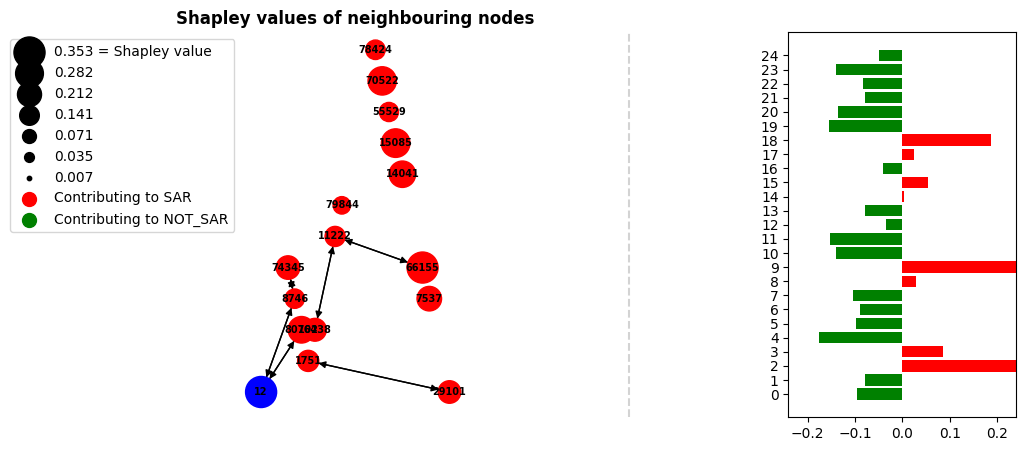

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx



G = to_networkx(testdata_expl)

# --- Printing information about node prediction ---
print(f'Explaining node {node_to_explain} which was prediced SAR.')
print(f'The node was predicted SAR (label 1) with probability {out[node_to_explain,out[node_to_explain].argmax().item()].item():.4f}.')
print(f'The true label is {testdata.y[node_to_explain]}.\n')

# --- Extract Shapley values ---
F = explainer.F
D = explanations[0].shape[0] - F
SV = explanations[0]
SV_features = SV[:F]
SV_nodes = SV[F:]

# Node coloring
color_map = ['blue']
size_map = [500]
labels = {0: node_to_explain}
SV_max = np.abs(SV_nodes).max()
SV_min = np.abs(SV_nodes).min()
printed_nodes=[]

#Find the average noode shapley value
SV_nodes = np.array(SV_nodes)
SV_nodes = SV_nodes[SV_nodes != 0]
average_node_shapley = np.mean(abs(SV_nodes))
print("Average node shapley value:", average_node_shapley)
#Only print values whose shapley values are above a certain threshold
# threshold = 0.1
# SV_nodes = np.array(SV_nodes)
# SV_nodes = SV_nodes[np.abs(SV_nodes) > threshold]

for i in range(len(SV_nodes)):
   # SV_subgraph_index = org_to_new_mapping[explainer.neighbours[i].item()]    
    #SV_node = SV_nodes[SV_subgraph_index-1]
    #if np.abs(SV_node)<average_node_shapley and SV_node>0:
    SV_node=SV_nodes[i]
    #if np.abs(SV_node) is None: #CHANGE THIS LATER, THIS IS JUST FOR TESTING
    if SV_node<average_node_shapley: #CHANGE THIS LATER, THIS IS JUST FOR TESTING

        print('node to small',SV_node)
        G.remove_node(i+1)
        print('removed node', i+1)
    else:
        size_map.append(500 * np.abs(SV_node) / SV_max)
        labels[i+1] = new_to_org_mapping[i+1]
        printed_nodes.append(new_to_org_mapping[i+1])
        if SV_node < 0:
            color_map.append('green')
        else: 
            color_map.append('red')

# Create figure
fig = plt.figure(figsize=(10, 5))

# --- Subplot for nodes ---
plt.subplot(1,3,1)

pos = nx.planar_layout(G)
#pos = nx.kamada_kawai_layout(G)
print("Length of size_map:", len(size_map))
print("Number of nodes in the graph:", len(G.nodes))

nx.draw(G, pos=pos, with_labels=True, labels=labels, node_color=color_map, node_size=size_map, font_size=7, font_weight='bold')

# Add legend
plt.scatter([], [], c='black', s=500, label=f'{SV_max:.3f} = Shapley value')
plt.scatter([], [], c='black', s=400, label=f'{4/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=300, label=f'{3/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=200, label=f'{2/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=100, label=f'{1/5*SV_max:.3f}')
plt.scatter([], [], c='black', s=50, label=f'{50/500*SV_max:.3f}')
plt.scatter([], [], c='black', s=10, label=f'{10/500*SV_max:.3f}')
plt.scatter([], [], c='red', s=100, label='Contributing to SAR')
plt.scatter([], [], c='green', s=100, label='Contributing to NOT_SAR')
plt.legend(bbox_to_anchor=(0, 1),loc='upper right')

plt.title('Shapley values of neighbouring nodes',fontweight='bold')

# --- Add vertical line to separate the plots ---
plt.subplot(1, 3, 2)
plt.axvline(x=5, color='lightgray', linestyle='--')
plt.axis('off')  # Turn off axis

# --- Shapley Values for features ---
plt.subplot(1, 3, 3)
# Extract features that are used in the explanation, and get their original feature names
feat_idx, discarded_feat_idx = explainer.feature_selection(node_to_explain, "Expectation")
print(len(feat_idx))
feature_names_in_explanation = [feature_names[i] for i in feat_idx]

colors = ['green' if e < 0 else 'red' for e in SV_features]
plt.barh(range(len(SV_features)), SV_features, color=colors)
xlim = np.abs(SV_features).max()
plt.xlim(-xlim, xlim)
plt.yticks(range(len(SV_features)), feature_names_in_explanation)
plt.xlabel('Shapley values')
plt.scatter([], [], c='red', s=100, marker = 's', label='Feature contributing to SAR')
plt.scatter([], [], c='green', s=100, marker = 's', label='Feature contributing to NOT_SAR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Shapley values of node features',fontweight='bold')

# --- Plot figures ---
plt.show()



In [27]:
printed_nodes

[68590, 49803, 48267, 28706, 88391]

In [40]:
def find_true_label(node_index, dataset):
    return dataset.y[node_index].item()



# Find true label of neighbouring nodes with shapley value contributing positvely to the explanation:
print("Nodes contributing positively to the explanation:")
for i in range(len(SV_nodes)):
    SV_subgraph_index = org_to_new_mapping[explainer.neighbours[i].item()]    
    SV_node = SV_nodes[SV_subgraph_index-1]
    if SV_node > 0 :
        print(f"Node {new_to_org_mapping[i+1]} with shapley value {SV_node:.4f} contributes positively to the explanation.")
        print(f"The true label of the node is {find_true_label(new_to_org_mapping[i+1], testdata)}.")


# Find true label of neighbouring nodes with shapley value contributing negatively to the explanation:
print("Nodes contributing negatively to the explanation:")
for i in range(len(SV_nodes)):
    SV_subgraph_index = org_to_new_mapping[explainer.neighbours[i].item()]    
    SV_node = SV_nodes[SV_subgraph_index-1]
    if SV_node < 0 :
        print(f"Node {new_to_org_mapping[i+1]} with shapley value {SV_node:.4f} contributes negatively to the explanation.")
        print(f"The true label of the node is {find_true_label(new_to_org_mapping[i+1], testdata)}.")


Nodes contributing positively to the explanation:


KeyError: 1

# GNNExplainer comparison

Node to explain: 12


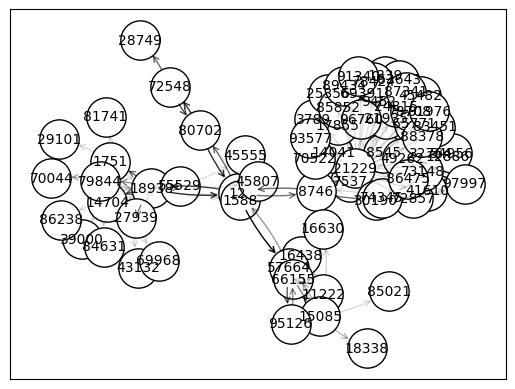

In [19]:
from torch_geometric.explain import Explainer, GNNExplainer

print(f'Node to explain: {node_to_explain}')

explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='probs',  # Model returns log probabilities.
    ),
)
testdata=torch_geometric.transforms.ToUndirected()(testdata)
explanation = explainer(testdata.x, testdata.edge_index, index=node_to_explain)

#explanation.visualize_feature_importance(top_k=10)
explanation.visualize_graph()

# LIME & SHAP for comparison

Starting forward_LIME...
Number of samples = 5000
Loading data...
number of graphs = 5000
Loading data into a single batch...
Starting forward pass...
out_tmp.shape = torch.Size([45000, 2])
Extracting output...
Finished.


[1824.59     608.19666  556.98     177.99986  806.19     461.42
    3.         0.         2.         0.     ]
Starting forward_LIME...
Number of samples = 20
Loading data...
number of graphs = 20
Loading data into a single batch...
Starting forward pass...
out_tmp.shape = torch.Size([180, 2])
Extracting output...
Finished.
Starting forward_LIME...
Number of samples = 1
Loading data...
number of graphs = 1
Loading data into a single batch...
Starting forward pass...
out_tmp.shape = torch.Size([9, 2])
Extracting output...
Finished.
Starting forward_LIME...
Number of samples = 20440
Loading data...
number of graphs = 20440
Loading data into a single batch...
Starting forward pass...
out_tmp.shape = torch.Size([183960, 2])
Extracting output...
Finished.


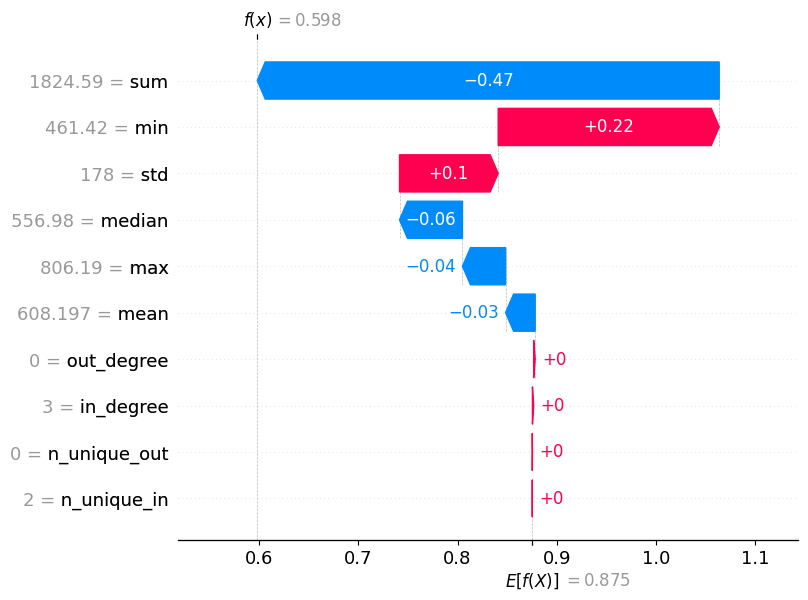

In [31]:
# --- Prepare model for NFVinput ---
data, org_to_new_mapping, new_to_org_mapping=utils.build_subgraph(testdata, node_to_explain, 3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#data.edge_index = data.edge_index.to(device)
data = data.to(device)

# --- LIME ---
num_features = 10
class_prob_fn = model.forward_NFVinput

# Prepare the model for handling the LIME explainer
model.set_test_data(data)
model.set_node_to_explain(org_to_new_mapping[node_to_explain])

exp_LIME = LIME_explanation(node_to_explain = node_to_explain,
                                    num_features = num_features,
                                    class_prob_fn = class_prob_fn,
                                    testdata = testdata,
                                    feature_names = feature_names,
                                    target_names = target_names)

exp_LIME.show_in_notebook(show_table=True, show_all=False)


# --- SHAP ---
K = 20
class_prob_fn = model.forward_NFVinput

exp_SHAP = SHAP_explanation(node_to_explain = node_to_explain,
                                         class_prob_fn = class_prob_fn,
                                         backgrounddata = traindata,
                                         explaindata = testdata,
                                         feature_names = feature_names,
                                         K = K)

shap.plots.waterfall(exp_SHAP[0])

# Old stuff, maybe delete later

In [8]:
# --- OLD STUFF, MAYBE DELETE LATER ---

# - Extracting Shapley values and printing some information -
# print(type(explanations))
# print(len(explanations))
# print(type(explanations[0]))
# print(explanations[0].shape)

# F = explainer.F
# D = explanations[0].shape[0] - F
# SV = explanations[0]
# SV_features = SV[:F]
# SV_nodes = SV[F:]

# print(f'Sum of SV_features: {SV_features.sum()}')
# print(f'Sum of SV_nodes: {SV_nodes.sum()}')

# _, idxs = torch.topk(torch.from_numpy(np.abs(SV)), 6)
# print(idxs)
# for i in idxs:
#     if i < F:
#         print(f'Feature {i} has SV {SV[i]}')
#     else:
#         print(f'Node {explainer.neighbours[i - F]} has SV {SV[i]}')


# - Plotting node feature shapley values -
# # Extract features that are used in the explanation, and get their original feature names
# feat_idx, discarded_feat_idx = explainer.feature_selection(node_to_explain, "Expectation")
# print(f'Feature indices: {feat_idx}\nDiscared feature indices: {discarded_feat_idx}')
# feature_names_in_explanation = [feature_names[i] for i in feat_idx]

# colors = ['green' if e < 0 else 'red' for e in SV_features]
# plt.barh(range(len(SV_features)), SV_features, color=colors)
# plt.xlim(-0.75, 0.75)
# plt.yticks(range(len(SV_features)), feature_names_in_explanation)
# plt.xlabel('SV_features')
# plt.ylabel('Features')
# plt.title('SV_features Bar Plot')
# plt.scatter([], [], c='red', s=300, label='Feature contributing to SAR')
# plt.scatter([], [], c='green', s=300, label='Feature contributing to NOT_SAR')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


# - Comparing the number of ingoing and outgoing neighbours for SAR predictions -
# def get_sar_prediction_ix(model, testdata):
#     model.eval()
#     with torch.no_grad():
#         out = model.forward(testdata.x, testdata.edge_index)
#         y_pred = out.argmax(dim=1)
#         sar_prediction_ix = torch.where(y_pred == 1)[0]
#     return sar_prediction_ix

# sar_prediction_ix = get_sar_prediction_ix(model, testdata)
# n_sar_prediction_ix = len(sar_prediction_ix)

# Checking the number of ingoing (edges going towards the node v) and outgoing (edges going away from the node v) neighbours.
# sar_prediction_n_outgoing_neighbours = []
# sar_prediction_n_ingoing_neighbours = []
# for count, v in enumerate(sar_prediction_ix):
#     outgoing_neighbour_ix = torch.where(testdata.edge_index[0] == v)
#     ingoing_neighbour_ix = torch.where(testdata.edge_index[1] == v)
#     outgoing_neighbour_ix = testdata.edge_index[1][outgoing_neighbour_ix]
#     ingoing_neighbour_ix = testdata.edge_index[0][ingoing_neighbour_ix]
#     n_outgoing_neighbours = len(outgoing_neighbour_ix)
#     n_ingoing_neighbours = len(ingoing_neighbour_ix)
#     sar_prediction_n_outgoing_neighbours.append(n_outgoing_neighbours)
#     sar_prediction_n_ingoing_neighbours.append(n_ingoing_neighbours)

# n_check = 20
# print(sar_prediction_n_ingoing_neighbours[:n_check])
# print(sar_prediction_n_ingoing_neighbours[-n_check:])
# print(sar_prediction_n_outgoing_neighbours[:n_check])
# print(sar_prediction_n_outgoing_neighbours[-n_check:])

# import matplotlib.pyplot as plt

# data_range_outgoing = max(sar_prediction_n_outgoing_neighbours) - min(sar_prediction_n_outgoing_neighbours)
# data_range_ingoing = max(sar_prediction_n_ingoing_neighbours) - min(sar_prediction_n_ingoing_neighbours)

# plt.figure(figsize=(10, 5))

# # Histogram for outgoing_neighbours
# plt.subplot(1, 2, 2)
# plt.hist(sar_prediction_n_outgoing_neighbours, bins=data_range_outgoing, color='green')
# plt.xlabel('Number of Outgoing Neighbours')
# plt.ylabel('Frequency')
# plt.title('Histogram of Outgoing Neighbours')

# # Histogram for ingoing_neighbours
# plt.subplot(1, 2, 1)
# plt.hist(sar_prediction_n_ingoing_neighbours, bins=data_range_ingoing, color='blue')
# plt.xlabel('Number of Ingoing Neighbours')
# plt.ylabel('Frequency')
# plt.title('Histogram of Ingoing Neighbours')

# plt.tight_layout()
# plt.show()

# print(f'max number of outgoing neighbours: {max(sar_prediction_n_outgoing_neighbours)}')
# print(f'max number of ingoing neighbours: {max(sar_prediction_n_ingoing_neighbours)}')


# --- Checking corectness of subgraph ---
# --- Checking that the subgraph is correct ---
# from torch_geometric.utils import k_hop_subgraph
# from torch_geometric.data import Data
# subset, edge_index, mapping, edge_mask = k_hop_subgraph(node_to_explain, 3, testdata.edge_index, relabel_nodes=True)

# x = testdata.x[subset,:]
# edges = testdata.edge_index[:, edge_mask]
# d = Data(x,edges)
# print(subset)
# print(x.shape)
# print(edges.shape)

# labels = {}
# for e in subset:
#     labels[e.item()] = e.item()

# plt.figure(figsize=(10, 5))
# plt.subplot(1,2,1)
# G = to_networkx(d)
# pos = nx.planar_layout(G)
# nx.draw(G, pos=pos, with_labels=True, labels=labels, font_size=7, font_weight='bold')
# plt.show()

# # --- Agnes implementation, jämförelse ---
# plt.subplot(1,2,2)
# G = to_networkx(data)
# pos = nx.planar_layout(G)

# labels = {}
# for new_node_ix in range(data.x.shape[0]):
#     orig_node_ix = new_to_org_mapping[new_node_ix]
#     labels[new_node_ix] = orig_node_ix
#     print(new_node_ix)
#     print(orig_node_ix)

# nx.draw(G, pos=pos, with_labels=True, labels=labels, font_size=7, font_weight='bold')
# plt.show()